Import required libraries and supress warnings

In [505]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

Global settings

In [506]:
#Set everything two 2 decimal places
pd.options.display.float_format = '{:.2f}'.format 

#Data understanding, preparation and EDA

Load dataset

In [507]:
# Load the dataset
bikes = pd.read_csv('drive/MyDrive/day.csv')
bikes.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349


Basic understanding of the data

Data shape

In [508]:
# Get the rows. columns count
bikes.shape

(730, 16)

Data info

In [509]:
# Get columns basic datatype and null details
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Get column names

In [510]:
#Column names
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Numerical data statistics

In [511]:
# Numerical values statistics - Remove categorical here
bikes[['instant',  'yr', 'mnth', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe()

,instant,yr,mnth,holiday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,0.50,6.53,0.03,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,210.88,0.50,3.45,0.17,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,0.00,1.00,0.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,0.00,4.00,0.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,365.50,0.50,7.00,0.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,547.75,1.00,10.00,0.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,730.00,1.00,12.00,1.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


Null checks

In [512]:
bikes.isnull().mean().sort_values(ascending= False)

instant      0.00
dteday       0.00
season       0.00
yr           0.00
mnth         0.00
holiday      0.00
weekday      0.00
workingday   0.00
weathersit   0.00
temp         0.00
atemp        0.00
hum          0.00
windspeed    0.00
casual       0.00
registered   0.00
cnt          0.00
dtype: float64

Data Preparation

Convert season to categorical

In [513]:
# Function to convert season to categorical
def season_to_categorical(x):
  return x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [514]:
seasonlist =  ['season']
bikes[seasonlist] = bikes[seasonlist].apply(season_to_categorical)

In [515]:
bikes['season'].value_counts().head(2)

fall      188
summer    184
Name: season, dtype: int64

Convert months to categorical

In [516]:
# Function to convert months to categorical
def months_to_categorical(x):
  return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [517]:
monthslist =  ['mnth']
bikes[monthslist] = bikes[monthslist].apply(months_to_categorical)

In [518]:
bikes['mnth'].value_counts().head(2)

Jan    62
Mar    62
Name: mnth, dtype: int64

Convert weekday to categorical

In [519]:
# Function to convert weekday to categorical
def weekday_to_categorical(x):
  return x.map({1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'})

In [520]:
weekdaylist =  ['weekday']
bikes[weekdaylist] = bikes[weekdaylist].apply(weekday_to_categorical)

In [521]:
bikes['weekday'].value_counts().head(2)

Sat    105
Mon    105
Name: weekday, dtype: int64

In [522]:
# Function to convert weathersit to categorical
def weathersit_to_categorical(x):
  return x.map({1: 'Clear', 2: 'Mist', 3: 'LightSnow', 4: 'HeavyRain'})

In [523]:
weathersitlist =  ['weathersit']
bikes[weathersitlist] = bikes[weathersitlist].apply(weathersit_to_categorical)

In [524]:
bikes['weathersit'].value_counts().head(2)

Clear    463
Mist     246
Name: weathersit, dtype: int64

Dropping unnessary columns

In [525]:
#Dropping unnessary columns
# instant column can be dropped
# dteday can be dropped as we have other supporting coulmns like weekday, workingday, holiday, yr etc
# cnt is a clubbed sum of casual and registered , hence we can fop them
bikes.drop(['instant', 'dteday','casual', 'registered'], axis=1, inplace=True)

Visualization

Pairplot of numerical values only with target variable

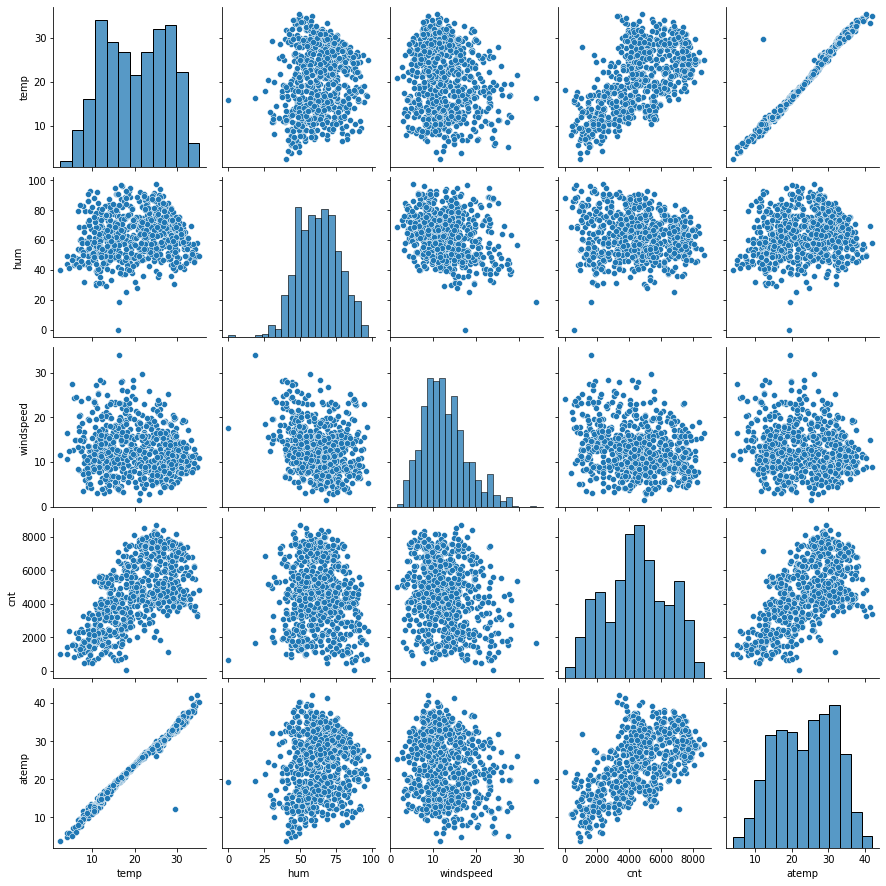

In [526]:
#Pairplot of numerical values only with target variable
numerical_cols_list = ['temp', 'hum','windspeed','cnt','atemp']
sns.pairplot(bikes[numerical_cols_list])
plt.show()

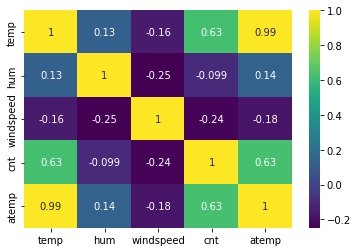

In [527]:
sns.heatmap(bikes[numerical_cols_list].corr(), annot= True, cmap='viridis')
plt.show()

**Observations**

1.   Temp and atemp are highly correlated, we can drop 1.




In [528]:
bikes.drop(['atemp'], axis=1, inplace=True)

Corelation of numerical values only with target variable

**Obseravtion** -   

1.   temp has a positive corelation
2.   humidity and windspped negative. However we need to see their p-values and multi colinerality later to decide if they are significant



Visualising Categorical Variables

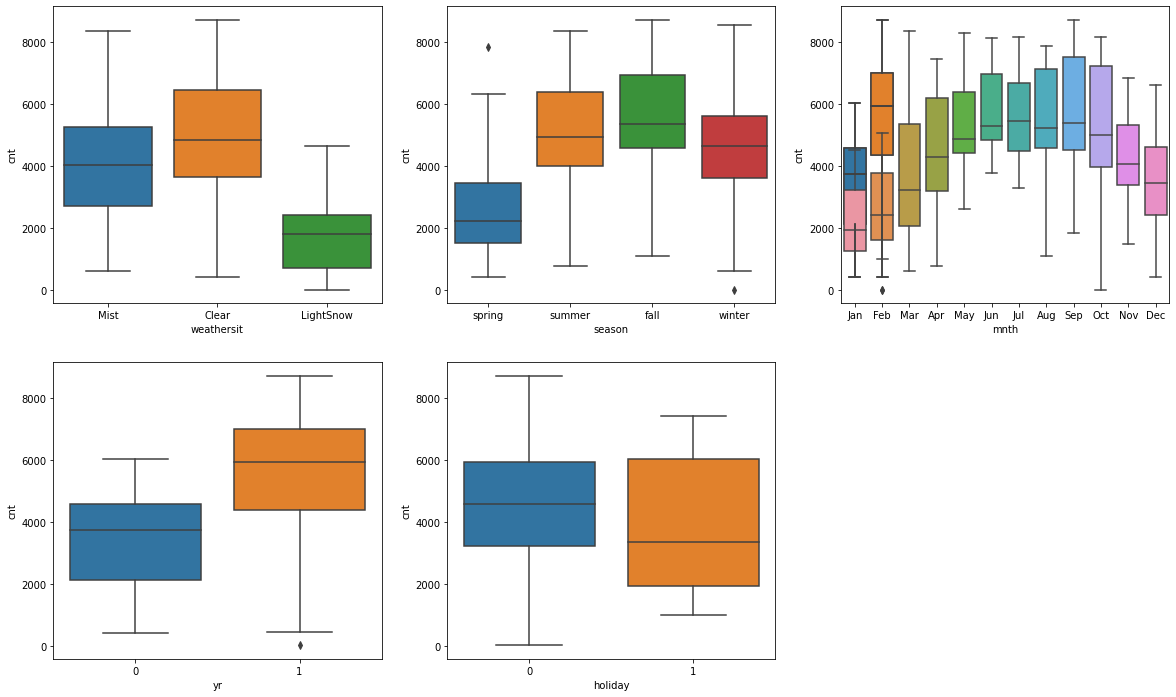

In [529]:
plt.figure(figsize=(20, 12))
# weathersit
plt.subplot(2,3,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)

# Season
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)

#Year
plt.subplot(2,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)

plt.subplot(2,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)

plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)

plt.subplot(2,3,4)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)

plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)


plt.show()

**Observations**

1.   Highest bikes were driven when clear weather
2.   Least bikes driven during spring.
3.   March-Sep were overall good months and rest Jan, Feb, Nov, Dec had decline.
4.   Year 2019 had more people using the bikes than 2018.
5.   On holidays we have a larger section using the bikes whereas on working 
     days more sales as the cnt was higher. Holidays might have families 
     planned some other activities.







Let's introduce a Hue and see it in more detail

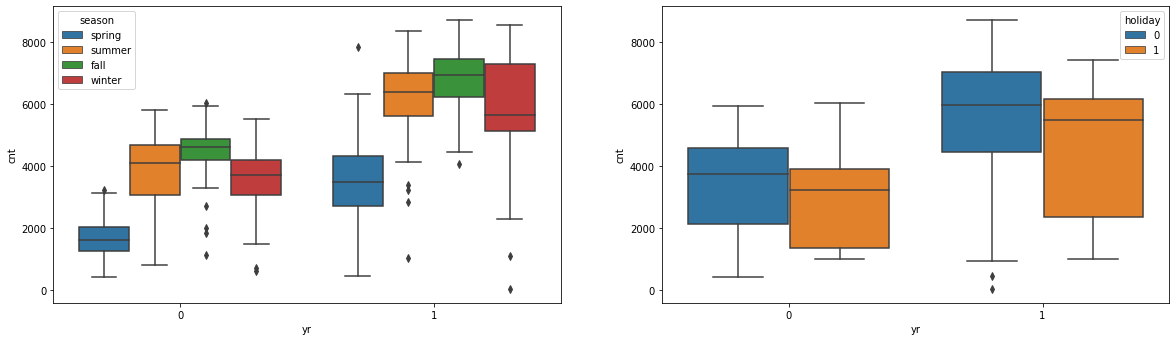

In [530]:
plt.figure(figsize=(20, 12))
#Year
plt.subplot(2,2,1)
sns.boxplot(x = 'yr', y = 'cnt', hue='season', data = bikes)

#Year
plt.subplot(2,2,2)
sns.boxplot(x = 'yr', y = 'cnt', hue='holiday', data = bikes)
plt.show()

**Observations**

1.   Both 2018 and 2019 had summer, spring seasons more bikes used.
2.   Year 2019 had more bikes rides during non-holidays.



Dummy Variables

In [531]:
dummies_variables_list = ['season','mnth','weekday','weathersit']
df_categorical_dummies = pd.get_dummies(bikes[dummies_variables_list],drop_first=True)
bikes = pd.concat([bikes, df_categorical_dummies], axis = 1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
0,spring,0,Jan,0,Sat,0,Mist,14.11,80.58,10.75,...,0,0,0,0,1,0,0,0,0,1
1,spring,0,Jan,0,NaN,0,Mist,14.90,69.61,16.65,...,0,0,0,0,0,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.05,43.73,16.64,...,0,0,0,1,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.20,59.04,10.74,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.31,43.70,12.52,...,0,0,0,0,0,0,0,1,0,0


Drop 'season','mnth','weekday','weathersit' as we have created the dummies for it

In [532]:
# Drop 'season','mnth','weekday','weathersit' as we have created the dummies for it
bikes.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

#Model building and evaluation

Splitting the Data into Training and Testing Sets

In [533]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

Rescaling the Features

In [534]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head(3)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
653,1,0,1,0.51,0.58,0.30,0.86,0,0,1,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,0.82,0.73,0.26,0.83,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.44,0.64,0.26,0.47,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [535]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
holiday,510.00,0.03,0.16,0.00,0.00,0.00,0.00,1.00
workingday,510.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
temp,510.00,0.54,0.23,0.00,0.34,0.54,0.74,1.00
hum,510.00,0.65,0.15,0.00,0.54,0.65,0.75,1.00
windspeed,510.00,0.32,0.17,0.00,0.20,0.30,0.41,1.00
cnt,510.00,0.51,0.22,0.00,0.36,0.52,0.68,1.00
season_spring,510.00,0.24,0.43,0.00,0.00,0.00,0.00,1.00
season_summer,510.00,0.25,0.43,0.00,0.00,0.00,0.00,1.00
season_winter,510.00,0.25,0.43,0.00,0.00,0.00,0.00,1.00


**Observation**

1.   All the numerical values are scaled and entire dataset lies within o and 1




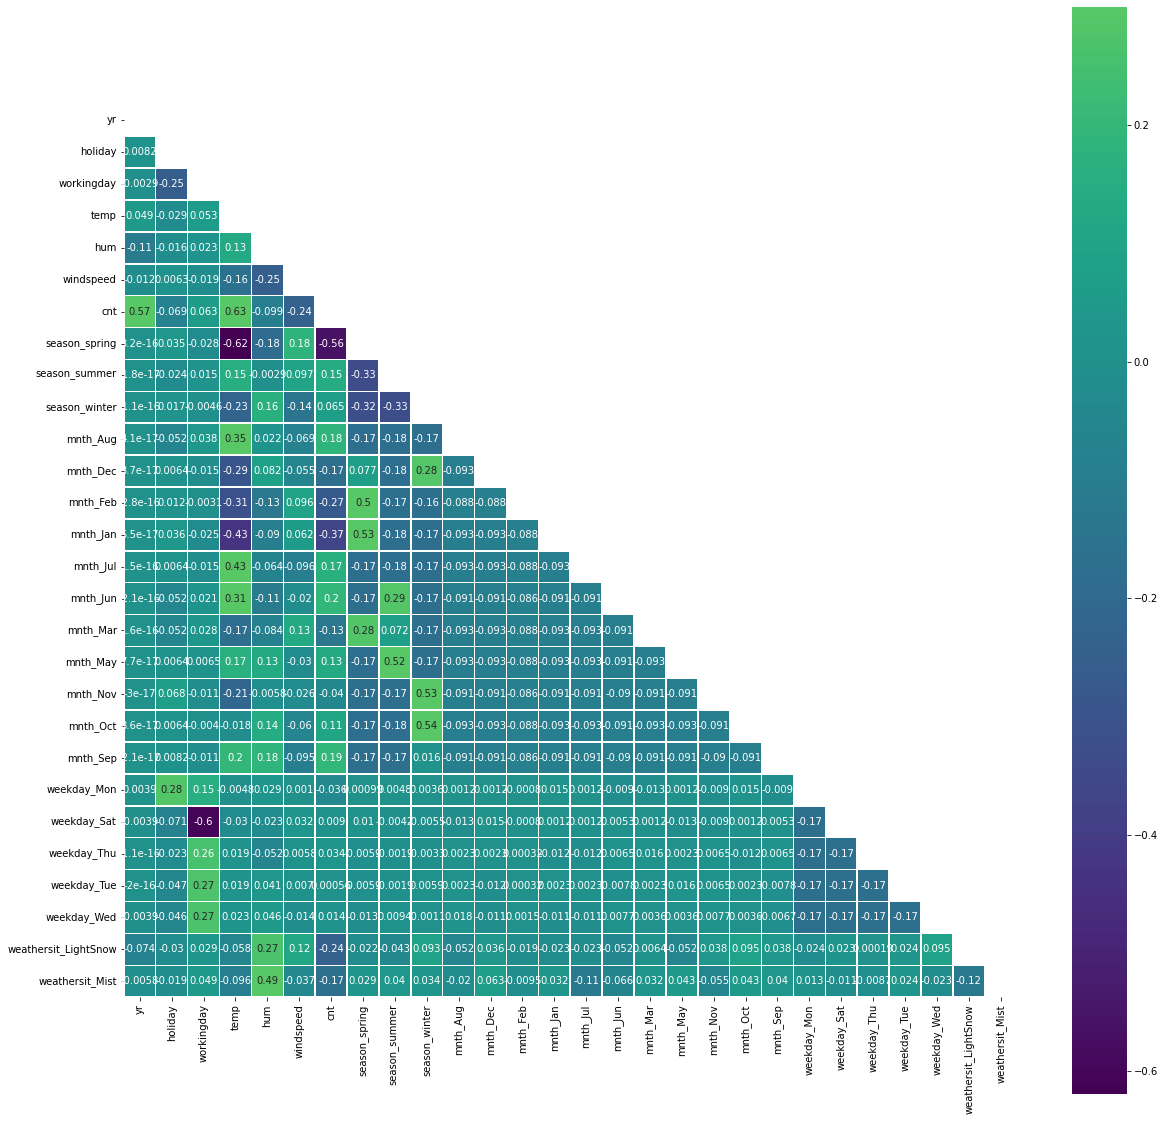

In [536]:
corr = bikes.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True,cmap='viridis', vmax=.3, center=0,
            square=True, linewidths=.5)


**Observations**


1.   Light snow weather has a negative corelation with cnt
2.   Spring season also has begative corelation with cnt







Dividing into X and Y sets for the model building

In [537]:
y_train = df_train.pop('cnt')
X_train = df_train

Scale test data 

In [538]:
test_var_list = ['temp', 'hum', 'windspeed', 'cnt']
df_test[test_var_list] = scaler.transform(df_test[test_var_list])

y_test = df_test.pop('cnt')
X_test = df_test


Inport linear model, RFE

In [539]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

Running RFE and selecting best 12 params

In [540]:
rfe = RFE(lm,n_features_to_select = 12)
rfe = rfe.fit(X_train, y_train)

In [541]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 6),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', False, 16),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 5),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 10),
 ('weekday_Sat', False, 2),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 11),
 ('weekday_Wed', False, 14),
 ('weathersit_LightSnow', True, 1),
 ('weathersit_Mist', True, 1)]

In [542]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jul', 'mnth_Sep',
       'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

In [543]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Mon', 'weekday_Sat', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [544]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.69e-190
Time:                        06:38:13   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2841 

#Observation

1.   The model looks good with R-Square and Adjusted R-Square very close to each other and also above 80.
2.   The P-values are also almost zero however there are many variables with negative co-relations.
3. yr, temp , season_summer, season_winter,mnth_Sep look more significant for now with positive corelations and low p-values



Checking VIF

In [545]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [546]:
def printVariance(x_train_passed):
  vif = pd.DataFrame()
  vif['Features'] = x_train_passed.columns
  vif['VIF'] = [variance_inflation_factor(x_train_passed.values, i) for i in range(x_train_passed.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  return vif.sort_values(by=['VIF'], ascending=False)


In [547]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

print(printVariance(X_train_rfe))

                Features   VIF
0                  const 74.38
6          season_spring  5.02
3                   temp  3.61
8          season_winter  3.49
7          season_summer  2.61
4                    hum  1.90
12       weathersit_Mist  1.56
9               mnth_Jul  1.48
10              mnth_Sep  1.30
11  weathersit_LightSnow  1.24
5              windspeed  1.19
1                     yr  1.03
2                holiday  1.02


#Observation 

1.   temp, humidity have very high variance. Lets remove humidity first and see the changes across the paramters.
2. Remove the 'hum' variable.




In [548]:
X_train_rfe = X_train_rfe.drop('hum', 1)


In [549]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_1 = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe_1).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          2.40e-187
Time:                        06:38:13   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1996 

In [550]:

print(printVariance(X_train_rfe_1))

                Features   VIF
0                  const 52.57
5          season_spring  4.95
3                   temp  3.38
7          season_winter  3.35
6          season_summer  2.59
8               mnth_Jul  1.48
9               mnth_Sep  1.29
4              windspeed  1.09
10  weathersit_LightSnow  1.05
11       weathersit_Mist  1.04
1                     yr  1.02
2                holiday  1.02


#Observations

1.   The p-values have become much more significant, coefficients have reduced.
2.   No much difference between R-Quare and Adjusted R-Square
3.   VIF for all the parameters have significantly reduced.




In [551]:
print(lm.params.sort_values(ascending=False))

temp                    0.49
yr                      0.23
const                   0.20
season_winter           0.08
mnth_Sep                0.08
season_summer           0.05
mnth_Jul               -0.05
season_spring          -0.07
weathersit_Mist        -0.08
holiday                -0.10
windspeed              -0.15
weathersit_LightSnow   -0.29
dtype: float64


Drop season spring as it has negative p-value as well as high variance

In [552]:
print(list(lm.params.index))

['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_LightSnow', 'weathersit_Mist']


Lets drop one of the seasons and see the affect

In [553]:
X_train_rfe = X_train_rfe.drop('season_spring', 1)
X_train_rfe_1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          2.09e-186
Time:                        06:38:13   Log-Likelihood:                 494.09
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1224 

In [554]:
print(printVariance(X_train_rfe_1))

                Features   VIF
0                  const 16.70
3                   temp  1.50
7               mnth_Jul  1.42
5          season_summer  1.33
6          season_winter  1.24
8               mnth_Sep  1.19
4              windspeed  1.09
9   weathersit_LightSnow  1.05
10       weathersit_Mist  1.04
1                     yr  1.02
2                holiday  1.02


#Observations

1.   There is a great improvement in variance across
2.   p-values have almost reached zero with a mix of positivie and negative co-efficiants.
3. R-Square very close to Adjusted R-square and still statys above 81



Lets drop one of the month and see the affect

In [555]:
X_train_rfe = X_train_rfe.drop('mnth_Jul', 1)
X_train_rfe_1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.37e-186
Time:                        06:38:14   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1264 

In [556]:
print(printVariance(X_train_rfe_1))

               Features   VIF
0                 const 16.50
3                  temp  1.20
6         season_winter  1.20
5         season_summer  1.19
7              mnth_Sep  1.11
4             windspeed  1.09
8  weathersit_LightSnow  1.05
9       weathersit_Mist  1.04
1                    yr  1.02
2               holiday  1.02


**Observations**

1.   month july can be dropped as the model params are almost same as the previous version and infact p-values are all zero now.




#Observation - Why stop here

1.   Removing season_winter, season_summer , windspeed, weathersit_mist are now reducing the r-square and adjusted r-sqauare. Hence lets stop here.
2.   p-values are all zero.
3.   Variance values are also less than 2.5



# Predictions

In [557]:
selectedFeatures = list(lm.params.index)
print(selectedFeatures)

['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_Sep', 'weathersit_LightSnow', 'weathersit_Mist']


In [558]:
final_columns = ['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_Sep', 'weathersit_LightSnow', 'weathersit_Mist']

In [559]:
X_train_res = X_train[final_columns]
X_train_res = sm.add_constant(X_train_res)
y_train_pred = lm.predict(X_train_res)

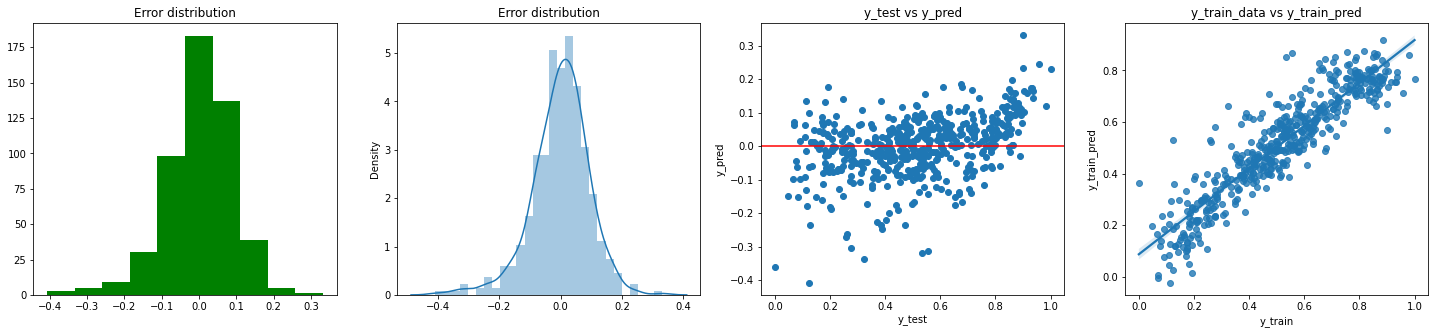

In [564]:
difference = y_train - y_train_pred

plt.figure(figsize=(25, 5))
plt.subplot(1,4,1)
plt.hist(difference, bins=10, color='Green')
plt.title('Error distribution')

plt.subplot(1,4,2)
sns.distplot(difference)
plt.title('Error distribution')

plt.subplot(1,4,3)
plt.scatter(y_train, difference)
plt.title('y_train vs y_pred')              
plt.xlabel('y_train')                          
plt.ylabel('y_pred')    
plt.axhline(y=0, color='red', linestyle='solid')

plt.subplot(1,4,4)
sns.regplot(x=y_train, y=y_train_pred)
plt.title('y_train_data vs y_train_pred') 
plt.xlabel('y_train')         
plt.ylabel('y_train_pred')  

plt.show()

#Observation

Error distibution is mormal.

y_train and Y-pred form a good linear model.

Error terms are not following any pattern

# Predicting on test data

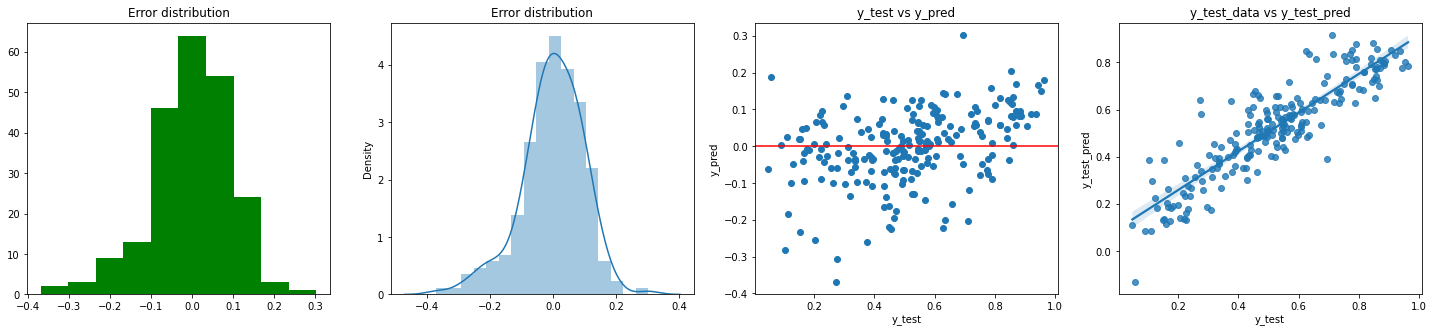

In [569]:
X_test_sm = sm.add_constant(X_test[final_columns])
y_test_pred = lm.predict(X_test_sm)

difference = y_test - y_test_pred

plt.figure(figsize=(25, 5))
plt.subplot(1,4,1)
plt.hist(difference, bins=10, color='Green')
plt.title('Error distribution')

plt.subplot(1,4,2)
sns.distplot(difference)
plt.title('Error distribution')

plt.subplot(1,4,3)
plt.scatter(y_test, difference)
plt.title('y_test vs y_pred')              
plt.xlabel('y_test')                          
plt.ylabel('y_pred')    
plt.axhline(y=0, color='red', linestyle='solid')

plt.subplot(1,4,4)
sns.regplot(x=y_test, y=y_test_pred)
plt.title('y_test_data vs y_test_pred') 
plt.xlabel('y_test')         
plt.ylabel('y_test_pred')  

plt.show()

# Mean square error

In [570]:
from sklearn.metrics import r2_score, mean_squared_error

In [574]:
print(mean_squared_error(y_test, y_test_pred))

0.009792258183115956


#Calculare R2 and Adjusted R2 of test data

In [576]:
r2ForTest = r2_score(y_test, y_test_pred)
print(r2ForTest)

0.793829001664065


In [579]:
# sample size
N = len(X_test)     
# Final variables selected
p =len(final_columns)     
r2_adjusted = round((1-((1-r2ForTest)*(N-1)/(N-p-1))),3)
print(r2_adjusted)

0.785


In [580]:
final_columns

['yr',
 'holiday',
 'temp',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_Sep',
 'weathersit_LightSnow',
 'weathersit_Mist']

# Final conclusions


1.   The final varibales list are 'yr',
 'holiday',
 'temp',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_Sep',
 'weathersit_LightSnow',
 'weathersit_Mist'
2.   R2 and Adjusted R2Square are petty close to each other both in training and test data.
3. Variables selected are having high significance and p-values are almost 0.
4. Varibale multicolinerality has been reduced significantly.
5. Removing now any varibales is causin R square to decrease hence thois proves the selected varibales are significant enough.
6. Error terms are normally distributed.
7. Error terms do not form any pattern.
8. Pred vs expected as a MSE of 0.009 which is good.

